In [2]:
import pandas as pd
import matplotlib as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, explained_variance_score
from sklearn import tree
from pathlib import Path
from imblearn.over_sampling import SMOTE
import tensorflow as tf
import keras_tuner as kt

Using TensorFlow backend


In [3]:
df = pd.read_csv("../Project-4/resources/heart_data.csv")

In [4]:
df[['Height_(cm)','Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption','FriedPotato_Consumption']] = df[['Height_(cm)','Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption','FriedPotato_Consumption']].astype('int64')


In [5]:
df.drop(df[df['Diabetes'] == "Yes, but female told only during pregnancy"].index, inplace = True)
df.drop(df[df['Diabetes'] == "No, pre-diabetes or borderline diabetes"].index, inplace = True)

In [6]:
df.replace('Yes',1,inplace=True)
df.replace('No',0,inplace=True)


In [7]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,0,1,Female,70-74,150,32.66,14.54,1,0,30,16,12
1,Very Good,Within the past year,0,1,0,0,0,1,0,Female,70-74,165,77.11,28.29,0,0,30,0,4
2,Very Good,Within the past year,1,0,0,0,0,1,0,Female,60-64,163,88.45,33.47,0,4,12,3,16
3,Poor,Within the past year,1,1,0,0,0,1,0,Male,75-79,180,93.44,28.73,0,0,30,30,8
4,Good,Within the past year,0,0,0,0,0,0,0,Male,80+,191,88.45,24.37,1,0,8,4,0


In [8]:
features_df = df.drop(['Heart_Disease','Checkup','General_Health'],axis=1)

In [9]:
features_df = pd.get_dummies(features_df,columns=['Age_Category','Sex'])

In [10]:
features_df.head()

,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Height_(cm),Weight_(kg),BMI,Smoking_History,...,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Sex_Female,Sex_Male
0,0,0,0,0,0,1,150,32.66,14.54,1,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,1,0,165,77.11,28.29,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,1,0,163,88.45,33.47,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,1,0,180,93.44,28.73,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,191,88.45,24.37,1,...,0,0,0,0,0,0,0,1,0,1


In [11]:
target_df = df['Heart_Disease'].ravel()
target_df[:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [12]:
features_df.shape

(299312, 29)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, random_state=78)

In [14]:
scaler=StandardScaler()

In [15]:
X_scaler = scaler.fit(X_train)

In [16]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [16]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [17]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [18]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [19]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,68691,169
Actual 1,5855,113


Accuracy Score : 0.9194953760624365
Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     68860
           1       0.40      0.02      0.04      5968

    accuracy                           0.92     74828
   macro avg       0.66      0.51      0.50     74828
weighted avg       0.88      0.92      0.88     74828



In [20]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, features_df.columns), reverse=True)

[(0.1635679284127279, 'BMI'),
 (0.14260333389749472, 'Weight_(kg)'),
 (0.10664654009593683, 'Green_Vegetables_Consumption'),
 (0.10367030715475746, 'Fruit_Consumption'),
 (0.10352547566479686, 'Height_(cm)'),
 (0.10042010449032722, 'FriedPotato_Consumption'),
 (0.06238530923571582, 'Alcohol_Consumption'),
 (0.027675233522235453, 'Diabetes'),
 (0.020129387705665303, 'Arthritis'),
 (0.018606583713647387, 'Depression'),
 (0.017082440807336993, 'Age_Category_80+'),
 (0.01592371184554486, 'Exercise'),
 (0.015539023971576133, 'Smoking_History'),
 (0.013965032017748489, 'Skin_Cancer'),
 (0.013943045581593214, 'Other_Cancer'),
 (0.010832049405138672, 'Age_Category_75-79'),
 (0.009816650779497763, 'Age_Category_70-74'),
 (0.008784906067985956, 'Age_Category_65-69'),
 (0.007596096155112661, 'Age_Category_60-64'),
 (0.006464213312769199, 'Sex_Female'),
 (0.006453549235692911, 'Age_Category_55-59'),
 (0.006013199186995285, 'Sex_Male'),
 (0.004861494489783339, 'Age_Category_50-54'),
 (0.00366758478

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

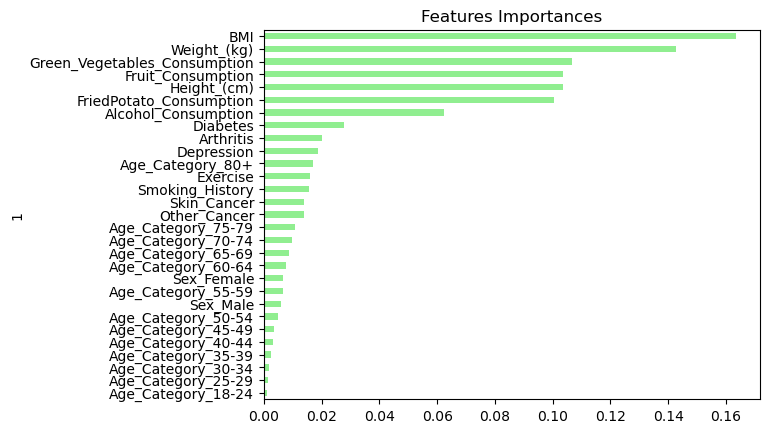

In [21]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, features_df.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

# Retrying the above model but now we are doing an oversample to help balance out the target column

In [24]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=78)

# Fit the original training data to the random_oversampler model
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

In [25]:
pd.DataFrame(y_train_res).value_counts()

0    206371
1    206371
dtype: int64

In [26]:
X_scaler = scaler.fit(X_train_res)

In [27]:
X_train_scaled_res = X_scaler.transform(X_train_res)
X_test_scaled_res = X_scaler.transform(X_test)

In [28]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [29]:
rf_model = rf_model.fit(X_train_scaled_res, y_train_res)

In [30]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [31]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [32]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,67873,987
Actual 1,5553,415


Accuracy Score : 0.9125995616614102
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     68860
           1       0.30      0.07      0.11      5968

    accuracy                           0.91     74828
   macro avg       0.61      0.53      0.53     74828
weighted avg       0.87      0.91      0.89     74828



In [33]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, features_df.columns), reverse=True)

[(0.12854299961619056, 'BMI'),
 (0.11294845862549314, 'Weight_(kg)'),
 (0.08573738858881245, 'Green_Vegetables_Consumption'),
 (0.08452706140355704, 'Height_(cm)'),
 (0.08304108871245731, 'Fruit_Consumption'),
 (0.0808246957673201, 'FriedPotato_Consumption'),
 (0.060525751927911396, 'Alcohol_Consumption'),
 (0.052422408929785884, 'Diabetes'),
 (0.0462163209711165, 'Arthritis'),
 (0.03207673398247729, 'Age_Category_80+'),
 (0.027625483161277622, 'Smoking_History'),
 (0.018811397489132457, 'Age_Category_75-79'),
 (0.017116701430695356, 'Exercise'),
 (0.015526379049324551, 'Depression'),
 (0.015381950658202324, 'Age_Category_70-74'),
 (0.014682507756059799, 'Other_Cancer'),
 (0.012857796351947618, 'Skin_Cancer'),
 (0.012029930705108577, 'Age_Category_18-24'),
 (0.011945542752136903, 'Age_Category_65-69'),
 (0.01100298275851382, 'Age_Category_35-39'),
 (0.01017245539882163, 'Age_Category_30-34'),
 (0.009886916765104269, 'Sex_Male'),
 (0.009683394989224835, 'Sex_Female'),
 (0.00889825811116

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

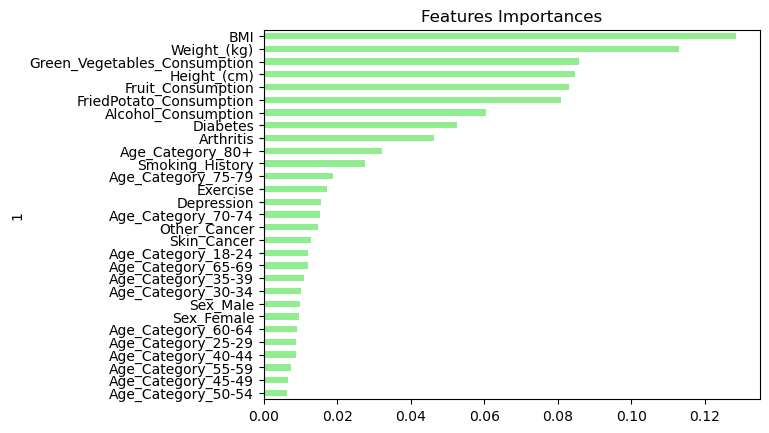

In [34]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, features_df.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

# Testing Decision Tree Model

Using unbalanced data



In [35]:
# Creating the decision tree classifier instance
tree_model = tree.DecisionTreeClassifier(random_state=78)
# Fitting the model
tree_model = tree_model.fit(X_train_scaled, y_train)

In [36]:
# Making predictions using the testing data
tree_predictions = tree_model.predict(X_test_scaled)

In [37]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, tree_predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, tree_predictions)

In [38]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, tree_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,63112,5748
Actual 1,4655,1313


Accuracy Score : 0.8609745015234939
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     68860
           1       0.19      0.22      0.20      5968

    accuracy                           0.86     74828
   macro avg       0.56      0.57      0.56     74828
weighted avg       0.87      0.86      0.87     74828



Using Oversampled Data

In [39]:
# Creating the decision tree classifier instance
tree_model = tree.DecisionTreeClassifier()
# Fitting the model
tree_model = tree_model.fit(X_train_scaled_res, y_train_res)

In [40]:
# Making predictions using the testing data
tree_predictions = tree_model.predict(X_test_scaled_res)

In [41]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, tree_predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, tree_predictions)

In [42]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, tree_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,63995,4865
Actual 1,4886,1082


Accuracy Score : 0.8696878173945581
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     68860
           1       0.18      0.18      0.18      5968

    accuracy                           0.87     74828
   macro avg       0.56      0.56      0.56     74828
weighted avg       0.87      0.87      0.87     74828



# Testing K Nearest Neighbors Model

Without oversampling

In [61]:
# Instantiate the model with k = 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
# Train the model
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [54]:
# Create predictions
knn_predictions = knn_model.predict(X_test_scaled)

In [55]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, knn_predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, knn_predictions)

In [56]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, knn_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,67686,1174
Actual 1,5477,491


Accuracy Score : 0.9111161597263057
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     68860
           1       0.29      0.08      0.13      5968

    accuracy                           0.91     74828
   macro avg       0.61      0.53      0.54     74828
weighted avg       0.87      0.91      0.89     74828



In [82]:
# Instantiate the model with k = 10 neighbors and algorithm auto-selected
knn_model = KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree')
# Train the model
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=10)

In [83]:
# Create predictions
knn_predictions = knn_model.predict(X_test_scaled)

In [84]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, knn_predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, knn_predictions)

In [85]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, knn_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,68606,254
Actual 1,5793,175


Accuracy Score : 0.9191880044902977
Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     68860
           1       0.41      0.03      0.05      5968

    accuracy                           0.92     74828
   macro avg       0.67      0.51      0.51     74828
weighted avg       0.88      0.92      0.89     74828



With Oversampling

In [57]:
# Instantiate the model with k = 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
# Train the model
knn_model.fit(X_train_scaled_res, y_train_res)

KNeighborsClassifier()

In [58]:
# Create predictions
knn_predictions = knn_model.predict(X_test_scaled_res)

In [59]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, knn_predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, knn_predictions)

In [60]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, knn_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,56623,12237
Actual 1,3396,2572


Accuracy Score : 0.7910808788154167
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.82      0.88     68860
           1       0.17      0.43      0.25      5968

    accuracy                           0.79     74828
   macro avg       0.56      0.63      0.56     74828
weighted avg       0.88      0.79      0.83     74828



In [88]:
# Instantiate the model with k = 10 neighbors and algorithm auto-selected
knn_model = KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree')
# Train the model
knn_model.fit(X_train_scaled_res, y_train_res)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=10)

In [89]:
# Create predictions
knn_predictions = knn_model.predict(X_test_scaled_res)

In [90]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, knn_predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, knn_predictions)

In [91]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, knn_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,51552,17308
Actual 1,2524,3444


Accuracy Score : 0.7349655209279948
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.75      0.84     68860
           1       0.17      0.58      0.26      5968

    accuracy                           0.73     74828
   macro avg       0.56      0.66      0.55     74828
weighted avg       0.89      0.73      0.79     74828



# Creating Models Using SMOTE oversampling

Using Random forests model


In [28]:
# Oversample data using SMOTE
oversample = SMOTE(random_state=78)
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [29]:
# Scale Data 
X_scaler = scaler.fit(X_train_smote)
X_train_scaled_smote = X_scaler.transform(X_train_smote)
X_test_scaled_smote = X_scaler.transform(X_test)

In [16]:
# Create new rf_model
rf_model_smote = RandomForestClassifier(n_estimators=500, random_state=78)

In [41]:
rf_model_smote = rf_model_smote.fit(X_train_scaled_smote, y_train_smote)
# Making predictions using the testing data
predictions = rf_model_smote.predict(X_test_scaled_smote)

In [42]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [43]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,67641,1219
Actual 1,5553,415


Accuracy Score : 0.9094991179772278
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     68860
           1       0.25      0.07      0.11      5968

    accuracy                           0.91     74828
   macro avg       0.59      0.53      0.53     74828
weighted avg       0.87      0.91      0.89     74828



In [44]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model_smote.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model_smote.feature_importances_, features_df.columns), reverse=True)

[(0.0824902815352038, 'Exercise'),
 (0.05614791029603129, 'BMI'),
 (0.055100108405030934, 'Weight_(kg)'),
 (0.05087738650493705, 'Height_(cm)'),
 (0.04320229425485921, 'Age_Category_55-59'),
 (0.043180354806149755, 'Sex_Female'),
 (0.04303963618846246, 'Age_Category_50-54'),
 (0.04251572975822245, 'Age_Category_60-64'),
 (0.04188358310501162, 'Age_Category_45-49'),
 (0.040492084861853725, 'Age_Category_35-39'),
 (0.04027220144719904, 'Age_Category_40-44'),
 (0.039096206853873175, 'Age_Category_30-34'),
 (0.03881049608681381, 'Age_Category_18-24'),
 (0.03873907924882775, 'Green_Vegetables_Consumption'),
 (0.03780302308985861, 'Age_Category_65-69'),
 (0.037708154747737505, 'Alcohol_Consumption'),
 (0.037029788304359004, 'FriedPotato_Consumption'),
 (0.036698509567060236, 'Fruit_Consumption'),
 (0.03565964379674181, 'Age_Category_25-29'),
 (0.03335797945344398, 'Age_Category_70-74'),
 (0.02911908653458478, 'Sex_Male'),
 (0.023390798647980736, 'Age_Category_75-79'),
 (0.02025855557309598, 

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

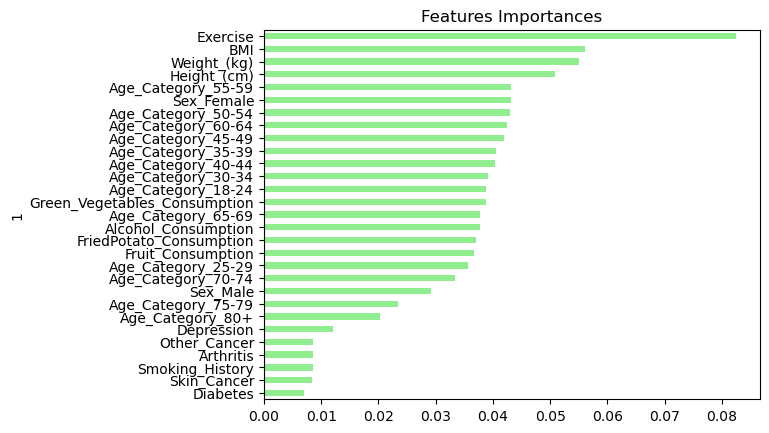

In [45]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model_smote.feature_importances_, features_df.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

Using Logistic Regression and SMOTE oversampled data

In [47]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=1000, random_state=78)

In [48]:
classifier.fit(X_train_scaled_smote, y_train_smote)

LogisticRegression(max_iter=1000, random_state=78)

In [51]:
predictions = classifier.predict(X_test_scaled_smote)

In [53]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [54]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,66110,2750
Actual 1,4943,1025


Accuracy Score : 0.8971908911102796
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     68860
           1       0.27      0.17      0.21      5968

    accuracy                           0.90     74828
   macro avg       0.60      0.57      0.58     74828
weighted avg       0.88      0.90      0.89     74828



With KNearest Neighbors

In [17]:
# Instantiate the model with k = 10 neighbors and algorithm auto-selected
knn_model_smote = KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree')
# Train the model
knn_model_smote.fit(X_train_scaled_smote, y_train_smote)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=10)

In [18]:
# Create predictions
knn_predictions_smote = knn_model_smote.predict(X_test_scaled_smote)

In [19]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, knn_predictions_smote)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, knn_predictions_smote)

In [20]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, knn_predictions_smote))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,64729,4131
Actual 1,4978,990


Accuracy Score : 0.8782674934516491
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     68860
           1       0.19      0.17      0.18      5968

    accuracy                           0.88     74828
   macro avg       0.56      0.55      0.56     74828
weighted avg       0.87      0.88      0.87     74828



# Creating Neural Network

In [18]:
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow keras to select activation function
    activation = hp.Choice('activation', ['relu', 'tanh', 'sigmoid', 'softmax'])

    # decide on the number of neurons in the first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units', min_value= 10, max_value=100, step=5),activation=activation))

    # decide the number of hidden layers and neurons in layers
    for i in range(hp.Int('num_layers', 2, 7)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i), min_value= 10, max_value=100, step=5), activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    #compile Model
    nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return nn_model

In [20]:
# create tuner
tuner = kt.Hyperband(create_model, objective='val_accuracy', max_epochs=50, hyperband_iterations=2)


In [25]:
tuner.search(X_train_scaled,y_train,epochs=100,validation_data=(X_test_scaled,y_test))

Trial 105 Complete [00h 00m 17s]
val_accuracy: 0.9202437400817871

Best val_accuracy So Far: 0.9203373193740845
Total elapsed time: 02h 02m 55s

Search: Running Trial #106

Value             |Best Value So Far |Hyperparameter
tanh              |sigmoid           |activation
20                |90                |first_units
4                 |2                 |num_layers
100               |90                |units_0
10                |75                |units_1
65                |25                |units_2
85                |40                |units_3
75                |40                |units_4
55                |35                |units_5
65                |15                |units_6
2                 |17                |tuner/epochs
0                 |6                 |tuner/initial_epoch
3                 |3                 |tuner/bracket
0                 |2                 |tuner/round

Epoch 1/2
  81/7016 [..............................] - ETA: 8s - loss: 0.3489 - accuracy: 0.

KeyboardInterrupt: 

In [26]:
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'sigmoid',
 'first_units': 90,
 'num_layers': 2,
 'units_0': 90,
 'units_1': 75,
 'units_2': 25,
 'units_3': 40,
 'units_4': 40,
 'units_5': 35,
 'units_6': 15,
 'tuner/epochs': 17,
 'tuner/initial_epoch': 6,
 'tuner/bracket': 3,
 'tuner/round': 2,
 'tuner/trial_id': '0041'}

In [28]:
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2339/2339 - 1s - loss: 0.2274 - accuracy: 0.9203 - 1s/epoch - 620us/step
Loss: 0.2274349182844162, Accuracy: 0.9203373193740845


In [17]:
nn = tf.keras.models.Sequential()

# add first hidden layer
nn.add(tf.keras.layers.Dense(units=90, activation='sigmoid', input_dim=29))

#add second hidden layer
nn.add(tf.keras.layers.Dense(units=75, activation='sigmoid'))

# add output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 90)                2700      
                                                                 
 dense_1 (Dense)             (None, 75)                6825      
                                                                 
 dense_2 (Dense)             (None, 1)                 76        
                                                                 
Total params: 9601 (37.50 KB)
Trainable params: 9601 (37.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
7016/7016 [==============================] - 5s 700us/step - loss: 0.2335 - accuracy: 0.9193
Epoch 2/100
7016/7016 [==============================] - 5s 694us/step - loss: 0.2313 - accuracy: 0.9193
Epoch 3/100
7016/7016 [==============================] - 5s 709us/step - loss: 0.2309 - accuracy: 0.9193
Epoch 4/100
7016/7016 [==============================] - 5s 735us/step - loss: 0.2307 - accuracy: 0.9193
Epoch 5/100
7016/7016 [==============================] - 5s 701us/step - loss: 0.2305 - accuracy: 0.9193
Epoch 6/100
7016/7016 [==============================] - 5s 711us/step - loss: 0.2303 - accuracy: 0.9193
Epoch 7/100
7016/7016 [==============================] - 5s 704us/step - loss: 0.2300 - accuracy: 0.9193
Epoch 8/100
7016/7016 [==============================] - 5s 693us/step - loss: 0.2299 - accuracy: 0.9193
Epoch 9/100
7016/7016 [==============================] - 5s 701us/step - loss: 0.2298 - accuracy: 0.9193
Epoch 10/100
7016/7016 [==============================]

In [20]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2339/2339 - 1s - loss: 0.2548 - accuracy: 0.9158 - 1s/epoch - 531us/step
Loss: 0.2548351585865021, Accuracy: 0.9157668352127075


In [21]:
nn_predictions = nn.predict(X_test_scaled)

2339/2339 [==============================] - 1s 533us/step


In [22]:
#set the y_prediction to binary
y_pred_bin = [1 if pred > 0.5 else 0 for pred in nn_predictions]

In [23]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_bin)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred_bin)

In [24]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred_bin))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,68236,624
Actual 1,5679,289


Accuracy Score : 0.9157668252525792
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     68860
           1       0.32      0.05      0.08      5968

    accuracy                           0.92     74828
   macro avg       0.62      0.52      0.52     74828
weighted avg       0.87      0.92      0.89     74828



Neural Network Using SMOTE

In [22]:
tuner.search(X_train_scaled_smote,y_train_smote,epochs=100,validation_data=(X_test_scaled_smote,y_test))

Trial 101 Complete [00h 00m 31s]
val_accuracy: 0.0797562375664711

Best val_accuracy So Far: 0.9203239679336548
Total elapsed time: 03h 43m 40s

Search: Running Trial #102

Value             |Best Value So Far |Hyperparameter
sigmoid           |tanh              |activation
70                |100               |first_units
4                 |3                 |num_layers
80                |75                |units_0
85                |40                |units_1
65                |90                |units_2
55                |25                |units_3
100               |85                |units_4
15                |95                |units_5
90                |35                |units_6
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
3                 |3                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
 1834/12899 [===>..........................] - ETA: 9s - loss: 0.2830 - accuracy: 

KeyboardInterrupt: 

In [23]:
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 100,
 'num_layers': 3,
 'units_0': 75,
 'units_1': 40,
 'units_2': 90,
 'units_3': 25,
 'units_4': 85,
 'units_5': 95,
 'units_6': 35,
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 3,
 'tuner/round': 0}

In [24]:
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2339/2339 - 1s - loss: 0.2297 - accuracy: 0.9203 - 1s/epoch - 575us/step
Loss: 0.22966106235980988, Accuracy: 0.920283854007721


In [25]:
nn_smote = tf.keras.models.Sequential()

# add first hidden layer
nn_smote.add(tf.keras.layers.Dense(units=100, activation='tanh', input_dim=29))

#add second hidden layer
nn_smote.add(tf.keras.layers.Dense(units=40, activation='tanh'))

#add third hidden layer
nn_smote.add(tf.keras.layers.Dense(units=90, activation='tanh'))

# add output layer
nn_smote.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

nn_smote.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               3000      
                                                                 
 dense_4 (Dense)             (None, 40)                4040      
                                                                 
 dense_5 (Dense)             (None, 90)                3690      
                                                                 
 dense_6 (Dense)             (None, 1)                 91        
                                                                 
Total params: 10821 (42.27 KB)
Trainable params: 10821 (42.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
nn_smote.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
fit_model_smote = nn_smote.fit(X_train_scaled_smote, y_train_smote, epochs=100)

Epoch 1/100
12899/12899 [==============================] - 10s 708us/step - loss: 0.2167 - accuracy: 0.9009
Epoch 2/100
12899/12899 [==============================] - 9s 709us/step - loss: 0.2088 - accuracy: 0.9045
Epoch 3/100
12899/12899 [==============================] - 9s 717us/step - loss: 0.2064 - accuracy: 0.9060
Epoch 4/100
12899/12899 [==============================] - 9s 706us/step - loss: 0.2041 - accuracy: 0.9072
Epoch 5/100
12899/12899 [==============================] - 9s 712us/step - loss: 0.2019 - accuracy: 0.9082
Epoch 6/100
12899/12899 [==============================] - 9s 711us/step - loss: 0.1999 - accuracy: 0.9091
Epoch 7/100
12899/12899 [==============================] - 9s 707us/step - loss: 0.1978 - accuracy: 0.9105
Epoch 8/100
12899/12899 [==============================] - 9s 707us/step - loss: 0.1957 - accuracy: 0.9117
Epoch 9/100
12899/12899 [==============================] - 9s 704us/step - loss: 0.1939 - accuracy: 0.9127
Epoch 10/100
12899/12899 [==========

In [31]:
model_loss, model_accuracy = nn_smote.evaluate(X_test_scaled_smote,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2339/2339 - 1s - loss: 0.3058 - accuracy: 0.8798 - 1s/epoch - 544us/step
Loss: 0.30579760670661926, Accuracy: 0.8798043727874756


In [32]:
nn_smote_predictions = nn_smote.predict(X_test_scaled_smote)

2339/2339 [==============================] - 1s 509us/step


In [33]:
#set the y_prediction to binary
y_pred_bin = [1 if pred > 0.5 else 0 for pred in nn_smote_predictions]

In [34]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred_bin)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred_bin)

In [35]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred_bin))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,64833,4027
Actual 1,4967,1001


Accuracy Score : 0.879804351312343
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     68860
           1       0.20      0.17      0.18      5968

    accuracy                           0.88     74828
   macro avg       0.56      0.55      0.56     74828
weighted avg       0.87      0.88      0.88     74828

